# Classification and Regression Tree (CART)

## Classification Tree

* Sequence of if-else questions about individual feaures.
* **Objective**: infer class labels.
* Able to capture non-linear relationships between features and labels.
* Don't require feature scaling(eg: Standardization, ...)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
breast_cancer = pd.read_csv("./data/wbc.csv", index_col=0)
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [3]:
breast_cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
y = breast_cancer['diagnosis']
le = LabelEncoder()
y = le.fit_transform(y)
list(le.classes_)

['B', 'M']

In [6]:
y[:5]

array([1, 1, 1, 1, 1])

In [7]:
X = breast_cancer.loc[:, ['radius_mean', 'concave points_mean']].values
print(f"\nX shape: {X.shape}\ny shape: {y.shape}")


X shape: (569, 2)
y shape: (569,)


In [8]:
splits = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_test, y_train, y_test = splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 2)
X_test shape: (114, 2)
y_train shape: (455,)
y_test shape: (114,)


In [9]:
dt = DecisionTreeClassifier(max_depth=6, random_state=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [10]:
print(y_pred[:5])

[1 0 1 0 0]


In [11]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 91.23%


## Decision Boundaries

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logreg = LogisticRegression(random_state=5)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=5)

In [14]:
def plot_decision_boundary(X, y, clf):
    """
    plot the decision boundary
    """
    # assign a color to each point in mesh[x_min, x_max] x [y_min, y_max]
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('radius_mean')
    plt.ylabel('concave points_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    #plt.xticks(())
    #plt.yticks(())

    plt.show()

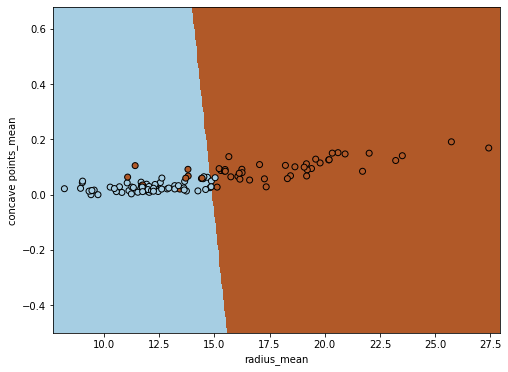

In [15]:
plot_decision_boundary(X_test, y_test, logreg)

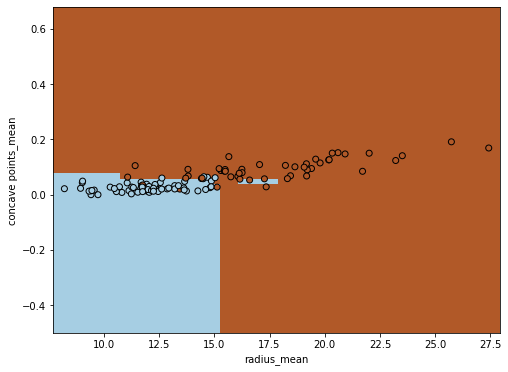

In [16]:
# decision tree boundaries
plot_decision_boundary(X_test, y_test, dt)

In [17]:
from sklearn import tree

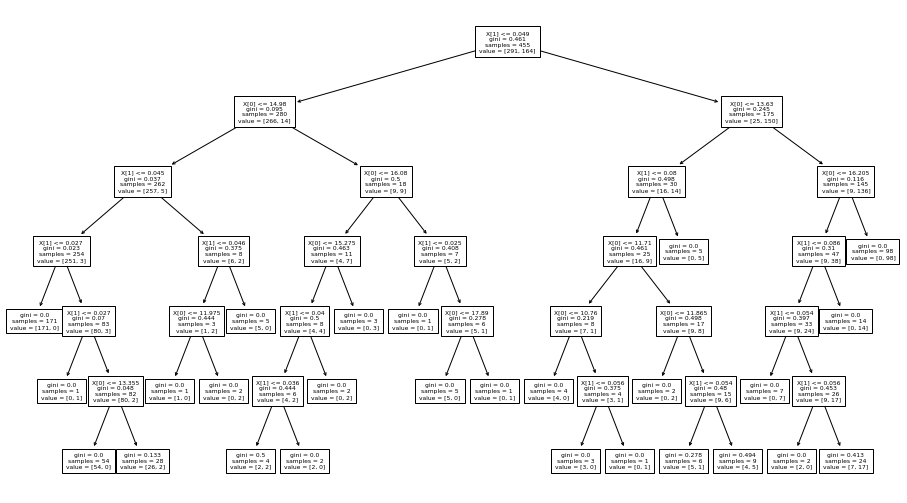

In [18]:
plt.figure(figsize=(16, 9))
tree.plot_tree(dt, fontsize=6);

In [19]:
splits = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_test, y_train, y_test = splits
dt_gini = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=5)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
acc_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy (gini): {acc_gini * 100:.2f}%")

Accuracy (gini): 92.11%


In [21]:
splits = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_test, y_train, y_test = splits
dt_ent = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=5)
dt_ent.fit(X_train, y_train)
y_pred_ent = dt_ent.predict(X_test)
acc_ent = accuracy_score(y_test, y_pred_ent)
print(f"Accuracy (entropy): {acc_ent * 100:.2f}%")

Accuracy (entropy): 88.60%


## Decision Tree for regression

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

In [22]:
auto = pd.read_csv("./data/auto.csv")
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


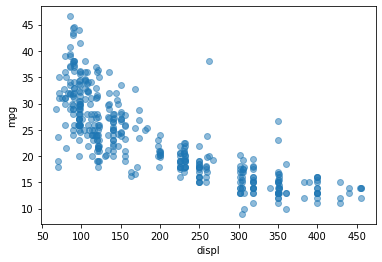

In [24]:
fig, ax = plt.subplots()
ax.scatter(auto.displ, auto.mpg, alpha=0.5)
ax.set(xlabel="displ", ylabel="mpg")
plt.show()

In [40]:
X = auto.displ.values.reshape(-1, 1)  # single feature
y = auto.mpg.values

splits = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, X_test, y_train, y_test = splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (313, 1)
X_test shape: (79, 1)
y_train shape: (313,)
y_test shape: (79,)


In [42]:
dtreg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=5)
dtreg.fit(X_train, y_train)
y_pred = dtreg.predict(X_test)

# compute test set MSE
mse_dt = MSE(y_test, y_pred)
# compute test set RMSE
rmse_dt = mse_dt ** (1/2)
print(f"RMSE: {rmse_dt}")

RMSE: 3.877802971415445
